#### [딥러닝 프로젝트]
- 의료 데이터를 통한 질병 예측


- 사용한 데이터: 캐글 설문조사
- 학습 목적: 올바른 생활습관이 질병에 미치는 영향 알아보기


[1] 데이터 전처리

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from func import show_outliers

[1] -1 데이터 불러오기 및 컬럼 선정

 ##### 컬럼 의미
 state: 거주 주  
 fmonth: 파일 생성한 월  
 idate: 설문일  
 imonth: 설문월    
 iday: 설문 요일   
 iyear: 설문 연도  
 dispcode: 설문 결과 (설문을 다 채웠는지 여부)  
 seqno: 설문일 코드  
 _psu: ?  
 ctelenum: 올바른 전화번호 여부  
 pvtresd1: 개인집??  
 .... 331개의 컬럼  (너무 많음)

In [124]:
raw_DF=pd.read_csv('brfss2013.csv', encoding='ISO-8859-1', low_memory=False, index_col=0)
raw_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491775 entries, 1 to 491775
Columns: 330 entries, X_state to X_age80
dtypes: float64(99), object(231)
memory usage: 1.2+ GB


##### 사용할 피쳐
- (dispcode: 설문 완료도)
- X_age80: 나이 (80이상 데이터가 존재하지 않음)
- wtkg3: 몸무게(kg)
- X_bmi5: bmi 지수
- sleptim1: 수면 시간
- children: 자녀 수
- (X_impcage: 자녀 나이)
- _smoker3: 흡연 상태 (never, former, current)
- smokday2: 현재 하루 흡연 횟수
- _drnkmo4: 월 음주 횟수
- avedrnk2: 지난 1달간 음주 횟수
- (employ1: 고용 상태)
- scntwrk1, scntlwk1: 주당 일하는 시간 (컬럼 합치는 작업 필요!!)
- exract11(운동타입), -exeroft1(운동횟수), -exerhmm1(운동시간)
- _frtlt1: (하루 한번 이상 과일을 먹는지)
- _veglt1: 하루 한번 이상 채소를 먹는지
- genhlth: 전반적 건강 (범주)
- qlactlm2: 건강 문제로 인한 활동 제약 여부
- emtsuprt: 심리 상담 필요 빈도
- chcscncr, chcocncr: 암 발생한 적 있는지
- chccopd1: 만성 폐질환 발생한 적 있는지
- havarth3: 관절염 걸린 적 있는지
- addepev2: 우울증 걸린 적 있는지
- chckidny: 간 질환 걸린적 있는지
- diabete3: 당뇨 걸린 적 있는지

- 어떤걸 타겟으로 할까?
[1] 전반적 건강 상태 예측 -> 생활습관, 질병 여부를 통해

In [126]:
# life_DF=raw_DF[['X_age80', 'wtkg3', 'X_bmi5', 'sleptim1', 'children', 'X_smoker3',
#                'smokday2', 'X_drnkmo4', 'avedrnk2', 'employ1', 'scntwrk1', 'scntlwk1', 'exract11',
#                 'exeroft1', 'exerhmm1', 'X_frtlt1', 'X_veglt1', 'genhlth', 'qlactlm2', 'emtsuprt', 
#                 'chcscncr', 'chcocncr',
#                  'chccopd1', 'havarth3', 'addepev2', 'chckidny', 'diabete3']]
# life_DF.to_csv('lifeDF.csv', header=True, index=False)
life_DF=pd.read_csv('lifeDF.csv', low_memory=False)
life_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491775 entries, 0 to 491774
Data columns (total 27 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   X_age80    491764 non-null  float64
 1   wtkg3      471090 non-null  float64
 2   X_bmi5     465048 non-null  float64
 3   sleptim1   484388 non-null  float64
 4   children   489501 non-null  float64
 5   X_smoker3  476442 non-null  object 
 6   smokday2   214792 non-null  object 
 7   X_drnkmo4  467893 non-null  float64
 8   avedrnk2   231185 non-null  float64
 9   employ1    488389 non-null  object 
 10  scntwrk1   32362 non-null   float64
 11  scntlwk1   21282 non-null   float64
 12  exract11   330827 non-null  object 
 13  exeroft1   327610 non-null  float64
 14  exerhmm1   323380 non-null  float64
 15  X_frtlt1   463072 non-null  object 
 16  X_veglt1   461611 non-null  object 
 17  genhlth    489790 non-null  object 
 18  qlactlm2   480446 non-null  object 
 19  emtsuprt   11621 non-nu

In [127]:
life_DF.columns=['age', 'weight', 'bmi', 'sleptime', 'children', 'smoker', 'smokday', 'acholPM', 'ave_drnk',
                 'employ', 'worktime1', 'worktime2', 'exer_type', 'exer_num', 'exer_time', 'fruit', 'veg',
                 'gen_health', 'act_limit', 'emo_support', 'caner1', 'caner2', 'chronic','hacarth',
                 'addep', 'kidny', 'diabete']

In [128]:
# 결측치 제거
for col in life_DF.columns:
    print(life_DF[col].isna().value_counts())
# 컬럼마다 결측치가 존재 -> 처리 필요

age
False    491764
True         11
Name: count, dtype: int64
weight
False    471090
True      20685
Name: count, dtype: int64
bmi
False    465048
True      26727
Name: count, dtype: int64
sleptime
False    484388
True       7387
Name: count, dtype: int64
children
False    489501
True       2274
Name: count, dtype: int64
smoker
False    476442
True      15333
Name: count, dtype: int64
smokday
True     276983
False    214792
Name: count, dtype: int64
acholPM
False    467893
True      23882
Name: count, dtype: int64
ave_drnk
True     260590
False    231185
Name: count, dtype: int64
employ
False    488389
True       3386
Name: count, dtype: int64
worktime1
True     459413
False     32362
Name: count, dtype: int64
worktime2
True     470493
False     21282
Name: count, dtype: int64
exer_type
False    330827
True     160948
Name: count, dtype: int64
exer_num
False    327610
True     164165
Name: count, dtype: int64
exer_time
False    323380
True     168395
Name: count, dtype: int64
fruit
Fal

In [129]:
life_DF.describe()

,age,weight,bmi,sleptime,children,acholPM,ave_drnk,worktime1,worktime2,exer_num,exer_time
count,491764.000000,471090.00000,465048.000000,484388.000000,489501.000000,467893.000000,231185.000000,32362.000000,21282.000000,327610.000000,323380.000000
mean,54.773696,8009.87800,2782.447803,7.052099,0.516720,11.199841,2.209905,43.036586,42.018043,135.771555,92.947681
std,17.031970,2020.49408,615.667745,1.604110,1.025019,33.502438,2.308685,15.851984,15.203182,50.494182,113.981085
min,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,42.000000,6577.00000,2367.000000,6.000000,0.000000,0.000000,1.000000,39.000000,40.000000,103.000000,30.000000
50%,57.000000,7711.00000,2663.000000,7.000000,0.000000,0.000000,2.000000,40.000000,40.000000,105.000000,45.000000
75%,68.000000,9072.00000,3081.000000,8.000000,1.000000,9.000000,2.000000,50.000000,48.000000,203.000000,100.000000
max,80.000000,29030.00000,9769.000000,450.000000,47.000000,2280.000000,76.000000,98.000000,150.000000,299.000000,959.000000


In [130]:
# 나이
life_DF[life_DF['age'].isna()==True]

,age,weight,bmi,sleptime,children,smoker,smokday,acholPM,ave_drnk,employ,...,gen_health,act_limit,emo_support,caner1,caner2,chronic,hacarth,addep,kidny,diabete
93152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93722,NaN,NaN,NaN,NaN,10.0,NaN,Every day,NaN,1.0,Out of work for 1 year or more,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177692,NaN,1.0,1.0,8.0,3.0,NaN,Some days,30.0,3.0,A homemaker,...,Very good,NaN,NaN,No,No,No,No,No,No,No
180059,NaN,3.0,3.0,103.0,47.0,Current smoker - now smokes every day,Every day,1.0,NaN,NaN,...,NaN,Yes,Always,Yes,NaN,NaN,Yes,Yes,NaN,Yes
180063,NaN,2.0,1.0,8.0,0.0,Current smoker - now smokes some days,Every day,NaN,NaN,A homemaker,...,Good,No,NaN,No,No,No,Yes,No,No,No
219940,NaN,NaN,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,Yes
220824,NaN,2.0,5.0,8.0,0.0,NaN,NaN,71.0,1.0,A student,...,Excellent,No,NaN,No,No,No,No,No,No,No
295932,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Out of work for less than 1 year,...,Excellent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295933,NaN,2.0,1.0,7.0,0.0,Current smoker - now smokes some days,NaN,NaN,NaN,Employed for wages,...,Very good,No,NaN,No,No,No,No,No,No,No
296323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# 다른 수치 기입이 부실한 사람은 제거, 데이터 수가 많으므로 나머지는 중앙값으로 대체
life_DF.drop(index=[93152, 93722, 219940, 295932, 296323, 491774], inplace=True)


In [132]:
life_DF.loc[life_DF['age'].isna()==True,'age']= life_DF.loc[life_DF['age'].isna()==True,'age'].fillna(life_DF['age'].median())
life_DF['age'].isna().value_counts()

age
False    491769
Name: count, dtype: int64

In [133]:
life_DF['age'].describe()
# 0살 제거
under= life_DF[life_DF['age']==0].index
life_DF.drop(index= under, inplace=True)

In [134]:
# 무게
life_DF[life_DF['weight'].isna()==True]

,age,weight,bmi,sleptime,children,smoker,smokday,acholPM,ave_drnk,employ,...,gen_health,act_limit,emo_support,caner1,caner2,chronic,hacarth,addep,kidny,diabete
7,60.0,NaN,NaN,6.0,0.0,Current smoker - now smokes every day,Every day,2.0,1.0,Retired,...,Good,Yes,NaN,No,No,No,Yes,No,No,No
35,56.0,NaN,NaN,8.0,0.0,Never smoked,NaN,NaN,NaN,Self-employed,...,Good,No,NaN,No,No,No,Yes,No,No,No
175,57.0,NaN,NaN,6.0,0.0,NaN,NaN,NaN,NaN,Retired,...,Very good,No,NaN,Yes,No,No,No,Yes,No,No
220,56.0,NaN,NaN,7.0,0.0,Never smoked,NaN,2.0,1.0,Employed for wages,...,Very good,Yes,NaN,Yes,No,No,Yes,No,No,No
256,67.0,NaN,NaN,8.0,0.0,Former smoker,Not at all,60.0,2.0,Retired,...,Very good,No,NaN,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491563,80.0,NaN,NaN,NaN,0.0,Never smoked,NaN,0.0,NaN,A homemaker,...,Fair,No,NaN,No,No,No,No,No,No,No
491650,22.0,NaN,NaN,7.0,0.0,Never smoked,NaN,0.0,NaN,A student,...,Good,No,NaN,No,No,No,No,No,No,No
491654,72.0,NaN,NaN,8.0,0.0,Former smoker,Not at all,0.0,NaN,Retired,...,Very good,No,NaN,No,Yes,No,Yes,No,No,No
491740,45.0,NaN,NaN,5.0,0.0,Never smoked,NaN,0.0,NaN,Self-employed,...,Fair,No,NaN,No,No,No,No,No,No,No


In [135]:
life_DF['weight'].describe()

count    471090.00000
mean       8009.87800
std        2020.49408
min           1.00000
25%        6577.00000
50%        7711.00000
75%        9072.00000
max       29030.00000
Name: weight, dtype: float64

In [136]:
life_DF[life_DF['weight']<1000]

,age,weight,bmi,sleptime,children,smoker,smokday,acholPM,ave_drnk,employ,...,gen_health,act_limit,emo_support,caner1,caner2,chronic,hacarth,addep,kidny,diabete
93721,1.0,10.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,Employed for wages,...,Good,No,NaN,No,No,No,No,No,No,"Yes, but female told only during pregnancy"
177692,57.0,1.0,1.0,8.0,3.0,NaN,Some days,30.0,3.0,A homemaker,...,Very good,NaN,NaN,No,No,No,No,No,No,No
180059,57.0,3.0,3.0,103.0,47.0,Current smoker - now smokes every day,Every day,1.0,NaN,NaN,...,NaN,Yes,Always,Yes,NaN,NaN,Yes,Yes,NaN,Yes
180063,57.0,2.0,1.0,8.0,0.0,Current smoker - now smokes some days,Every day,NaN,NaN,A homemaker,...,Good,No,NaN,No,No,No,Yes,No,No,No
220824,57.0,2.0,5.0,8.0,0.0,NaN,NaN,71.0,1.0,A student,...,Excellent,No,NaN,No,No,No,No,No,No,No
295933,57.0,2.0,1.0,7.0,0.0,Current smoker - now smokes some days,NaN,NaN,NaN,Employed for wages,...,Very good,No,NaN,No,No,No,No,No,No,No


In [137]:
##수치가 잘못된듯 이상치는 평균으로 대체
life_DF['weight'].fillna(life_DF['weight'].mean(), inplace=True)
# 몸무게가 이상한 사람들들 몸무게 /100  
life_DF.loc[life_DF['weight']>100,'weight']=life_DF.loc[life_DF['weight']>100,'weight']/100 

In [138]:

life_DF['weight'].isna().value_counts(), life_DF['weight'].describe()

(weight
 False    491768
 Name: count, dtype: int64,
 count    491768.00000
 mean         80.09882
 std          19.77543
 min           1.00000
 25%          65.77000
 50%          78.93000
 75%          90.72000
 max         290.30000
 Name: weight, dtype: float64)

In [139]:
# bmi
life_DF['bmi'].describe()
## 또 숫자가 이상하다

count    465048.000000
mean       2782.447803
std         615.667745
min           1.000000
25%        2367.000000
50%        2663.000000
75%        3081.000000
max        9769.000000
Name: bmi, dtype: float64

In [140]:
life_DF[life_DF['bmi']<1000]

,age,weight,bmi,sleptime,children,smoker,smokday,acholPM,ave_drnk,employ,...,gen_health,act_limit,emo_support,caner1,caner2,chronic,hacarth,addep,kidny,diabete
93721,1.0,10.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,Employed for wages,...,Good,No,NaN,No,No,No,No,No,No,"Yes, but female told only during pregnancy"
177692,57.0,1.0,1.0,8.0,3.0,NaN,Some days,30.0,3.0,A homemaker,...,Very good,NaN,NaN,No,No,No,No,No,No,No
180059,57.0,3.0,3.0,103.0,47.0,Current smoker - now smokes every day,Every day,1.0,NaN,NaN,...,NaN,Yes,Always,Yes,NaN,NaN,Yes,Yes,NaN,Yes
180063,57.0,2.0,1.0,8.0,0.0,Current smoker - now smokes some days,Every day,NaN,NaN,A homemaker,...,Good,No,NaN,No,No,No,Yes,No,No,No
220824,57.0,2.0,5.0,8.0,0.0,NaN,NaN,71.0,1.0,A student,...,Excellent,No,NaN,No,No,No,No,No,No,No
295933,57.0,2.0,1.0,7.0,0.0,Current smoker - now smokes some days,NaN,NaN,NaN,Employed for wages,...,Very good,No,NaN,No,No,No,No,No,No,No


In [141]:
##이상치는 평균으로 대체
life_DF['bmi'].fillna(life_DF['bmi'].mean(), inplace=True)
# bmi가 이상한 사람들 bmi /100  
life_DF.loc[life_DF['bmi']>100,'bmi']=life_DF.loc[life_DF['bmi']>100,'bmi']/100 

In [142]:
# sleptime
life_DF['sleptime'].describe() #103???????

count    484384.000000
mean          7.051199
std           1.472423
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max         103.000000
Name: sleptime, dtype: float64

In [143]:
# 16시간 초과해서 자는 사람들 삭제
over=life_DF[life_DF['sleptime']>16].index
life_DF.drop(index=over, inplace=True)

In [144]:
# 결측치 중앙값으로 대체
life_DF['sleptime'].fillna(life_DF['sleptime'].median(), inplace=True)
life_DF['sleptime'].isna().value_counts(), life_DF['sleptime'].describe()

(sleptime
 False    491439
 Name: count, dtype: int64,
 count    491439.000000
 mean          7.042144
 std           1.420281
 min           1.000000
 25%           6.000000
 50%           7.000000
 75%           8.000000
 max          16.000000
 Name: sleptime, dtype: float64)

In [145]:
# children 입양아까지 포함한 수
life_DF['children'].isna().value_counts(), life_DF['children'].describe()
#### 17명???? 걍 놔두자

(children
 False    489172
 True       2267
 Name: count, dtype: int64,
 count    489172.000000
 mean          0.516626
 std           1.022203
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max          17.000000
 Name: children, dtype: float64)

In [146]:
# 결측치는 0으로 대체
life_DF['children'].fillna(0, inplace=True)
life_DF['children'].isna().value_counts()

children
False    491439
Name: count, dtype: int64

In [147]:
# smoker (흡연경험)
life_DF['smoker'].info()
life_DF['smoker'].value_counts()

<class 'pandas.core.series.Series'>
Index: 491439 entries, 0 to 491773
Series name: smoker
Non-Null Count   Dtype 
--------------   ----- 
476128 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


smoker
Never smoked                             261514
Former smoker                            138041
Current smoker - now smokes every day     55110
Current smoker - now smokes some days     21463
Name: count, dtype: int64

In [148]:
# 결측치는 흡연경험 없는 걸로
life_DF['smoker'].fillna('Never smoked', inplace=True)
life_DF['smoker'].info()

<class 'pandas.core.series.Series'>
Index: 491439 entries, 0 to 491773
Series name: smoker
Non-Null Count   Dtype 
--------------   ----- 
491439 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


In [149]:
# smokday (하루 흡연량)
life_DF['smokday'].info(), life_DF['smokday'].value_counts()
# 같은 컬럼이므로 제거
life_DF.drop(columns='smokday', inplace=True)

<class 'pandas.core.series.Series'>
Index: 491439 entries, 0 to 491773
Series name: smokday
Non-Null Count   Dtype 
--------------   ----- 
214615 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


In [ ]:
# acholM 한달 음주량
life_DF['acholPM'].describe()
# 2280????

count    467590.000000
mean         11.202872
std          33.506814
min           0.000000
25%           0.000000
50%           0.000000
75%           9.000000
max        2280.000000
Name: acholPM, dtype: float64

In [151]:
# 일정 이상 넘는 음주량 제거
over= life_DF[life_DF['acholPM']>1000].index
life_DF.drop(index=over, inplace=True)
# 결측치는 0으로 대체(중앙값)
life_DF['acholPM'].fillna(0, inplace=True)
life_DF['acholPM'].info()

<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: acholPM
Non-Null Count   Dtype  
--------------   -----  
491398 non-null  float64
dtypes: float64(1)
memory usage: 7.5 MB


In [152]:
# ave_drnk 지난 1달간 음주 횟수
life_DF['ave_drnk'].describe()


count    231062.000000
mean          2.200366
std           2.192310
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          76.000000
Name: ave_drnk, dtype: float64

In [153]:
# 결측치는 중앙값으로 대체
life_DF['ave_drnk'].fillna(life_DF['ave_drnk'].median(), inplace=True)
life_DF['ave_drnk'].info()

<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: ave_drnk
Non-Null Count   Dtype  
--------------   -----  
491398 non-null  float64
dtypes: float64(1)
memory usage: 7.5 MB


In [154]:
# employ 고용상태
life_DF['employ'].info(),  life_DF['employ'].value_counts()

<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: employ
Non-Null Count   Dtype 
--------------   ----- 
488019 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


(None,
 employ
 Employed for wages                  202137
 Retired                             138141
 Self-employed                        39818
 Unable to work                       37332
 A homemaker                          31633
 Out of work for 1 year or more       14050
 A student                            12681
 Out of work for less than 1 year     12227
 Name: count, dtype: int64)

In [155]:
# 1년 이상 휴직중에 결측치 추가
life_DF['employ'].fillna('Out of work for 1 year or more', inplace=True)
life_DF['employ'].info()

<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: employ
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


In [156]:
# worktime1, worktime2 일하는 시간  ===> 데이터가 너무 적다... 제거
life_DF['worktime1'].info(), life_DF['worktime2'].info()

<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: worktime1
Non-Null Count  Dtype  
--------------  -----  
32348 non-null  float64
dtypes: float64(1)
memory usage: 7.5 MB
<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: worktime2
Non-Null Count  Dtype  
--------------  -----  
21257 non-null  float64
dtypes: float64(1)
memory usage: 7.5 MB


(None, None)

In [157]:
# 데이터를 보니 합칠 필요가 있음
life_DF.drop(columns=['worktime1', 'worktime2'], inplace=True)

In [158]:
life_DF['exer_type'].info(), life_DF['exer_type'].value_counts()
# 종류가 너무 많네... 제거
life_DF.drop(columns='exer_type', inplace=True)

<class 'pandas.core.series.Series'>
Index: 491398 entries, 0 to 491773
Series name: exer_type
Non-Null Count   Dtype 
--------------   ----- 
330663 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


In [159]:
# exer_num (운동 횟수)
life_DF['exer_num'].describe()
# 뭔가 이상하다..

count    327452.000000
mean        135.767560
std          50.490251
min           0.000000
25%         103.000000
50%         105.000000
75%         203.000000
max         299.000000
Name: exer_num, dtype: float64

In [39]:
# 결측지는 중앙값으로 대체
life_DF['exer_num'].fillna(life_DF['exer_num'].median(), inplace=True)


# 3등분 하자 -> 평균이하, 평균, 평균이상
life_DF= life_DF.sort_values(by='exer_num')
life_DF.reset_index(drop=True, inplace=True)
n=491398
life_DF.loc[:163799,'exer_num']='under_avg'
life_DF.loc[163799: 327598, 'exer_num']='average'
life_DF.loc[327598:, 'exer_num']='over_avg'
life_DF['exer_num'].info(), life_DF['exer_num'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: exer_num
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 exer_num
 over_avg     163800
 under_avg    163799
 average      163799
 Name: count, dtype: int64)

In [41]:
# exer_time (운동시간)
life_DF['exer_time'].describe(), life_DF['exer_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: exer_time
Non-Null Count   Dtype  
--------------   -----  
323232 non-null  float64
dtypes: float64(1)
memory usage: 3.7 MB


(count    323232.000000
 mean         92.949853
 std         113.971999
 min           1.000000
 25%          30.000000
 50%          45.000000
 75%         100.000000
 max         959.000000
 Name: exer_time, dtype: float64,
 None)

In [42]:
# 3등분으로 나누면 전 컬럼과 겹침으로 제거
life_DF.drop(columns='exer_time', inplace=True)

In [43]:
life_DF['fruit'].info(), life_DF['fruit'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: fruit
Non-Null Count   Dtype 
--------------   ----- 
462739 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 fruit
 Consumed fruit one or more times per day     291549
 Consumed fruit less than one time per day    171190
 Name: count, dtype: int64)

In [44]:
# 결측치는 안먹는다로 대체
life_DF['fruit'].fillna('Consumed fruit less than one time per day', inplace=True)
life_DF['fruit'].info(), life_DF['fruit'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: fruit
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 fruit
 Consumed fruit one or more times per day     291549
 Consumed fruit less than one time per day    199849
 Name: count, dtype: int64)

In [45]:
life_DF['veg'].info(), life_DF['veg'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: veg
Non-Null Count   Dtype 
--------------   ----- 
461277 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 veg
 Consumed vegetables one or more times per day     359627
 Consumed vegetables less than one time per day    101650
 Name: count, dtype: int64)

In [46]:
# 결측치 안먹는다로 대체
life_DF['veg'].fillna('Consumed vegetables less than one time per day', inplace=True)
life_DF['veg'].info(), life_DF['veg'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: veg
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 veg
 Consumed vegetables one or more times per day     359627
 Consumed vegetables less than one time per day    131771
 Name: count, dtype: int64)

In [47]:
# gen_health (전반적인 건강 상태)
life_DF['gen_health'].info(), life_DF['gen_health'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: gen_health
Non-Null Count   Dtype 
--------------   ----- 
489420 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 gen_health
 Very good    159028
 Good         150464
 Excellent     85445
 Fair          66645
 Poor          27838
 Name: count, dtype: int64)

In [48]:
# 결측치 GOOD으로 대체
life_DF['gen_health'].fillna('Good', inplace=True)
life_DF['gen_health'].info(), life_DF['gen_health'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: gen_health
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 gen_health
 Very good    159028
 Good         152442
 Excellent     85445
 Fair          66645
 Poor          27838
 Name: count, dtype: int64)

In [49]:
# actlimit 제거
life_DF.drop(columns='act_limit', inplace=True)

In [50]:
# emo_support 심리적 도움 필요성 여부

life_DF['emo_support'].info(), life_DF['emo_support'].value_counts()


<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: emo_support
Non-Null Count  Dtype 
--------------  ----- 
11611 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 emo_support
 Always       6549
 Usually      2261
 Sometimes    1665
 Never         626
 Rarely        510
 Name: count, dtype: int64)

In [51]:
# 결측치 Never로 변경
life_DF['emo_support'].fillna('Never', inplace=True)
life_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491398 entries, 0 to 491397
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   age          491398 non-null  float64
 1   weight       491398 non-null  float64
 2   bmi          491398 non-null  float64
 3   sleptime     491398 non-null  float64
 4   children     491398 non-null  float64
 5   smoker       491398 non-null  object 
 6   acholPM      491398 non-null  float64
 7   ave_drnk     491398 non-null  float64
 8   employ       491398 non-null  object 
 9   exer_num     491398 non-null  object 
 10  fruit        491398 non-null  object 
 11  veg          491398 non-null  object 
 12  gen_health   491398 non-null  object 
 13  emo_support  491398 non-null  object 
 14  caner1       490096 non-null  object 
 15  caner2       490258 non-null  object 
 16  chronic      488685 non-null  object 
 17  hacarth      488439 non-null  object 
 18  addep        489118 non-

In [52]:
# 숫자로 변경
life_DF['emo_support'].replace({'Always':5, 'Usually':4, 'Sometimes':3, 'Rarely':2, 'Never':1}, inplace=True)

In [53]:
# caner1, cancer2 -> 암 경험 여부 
life_DF['caner1'].info, life_DF['caner1'].value_counts()
# 결측치 No로 대체
life_DF['caner1'].fillna('No', inplace=True)

In [54]:
life_DF['caner2'].info(), life_DF['caner2'].value_counts()
# 결측치 No로 대체
life_DF['caner2'].fillna('No', inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: caner2
Non-Null Count   Dtype 
--------------   ----- 
490258 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [55]:
# 새로운 컬럼 생성 (암 경험이 있는지)
life_DF['cancer']= np.where((life_DF['caner1']=='Yes') | (life_DF['caner2']=='Yes'), 1,0) 
life_DF['cancer'].value_counts()

cancer
0    408872
1     82526
Name: count, dtype: int64

In [56]:
# 기존 컬럼 제거
life_DF.drop(columns=['caner1', 'caner2'], inplace=True)

In [57]:
# 만성 질병(폐)
life_DF['chronic'].info(), life_DF['chronic'].value_counts()
# 결측치 No로 대체
life_DF['chronic'].fillna('No', inplace=True)
life_DF['chronic'].info(), life_DF['chronic'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: chronic
Non-Null Count   Dtype 
--------------   ----- 
488685 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: chronic
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


(None,
 chronic
 No     450809
 Yes     40589
 Name: count, dtype: int64)

In [58]:
# hacarth (관절염 여부)
life_DF['hacarth'].info()
# 결측치 No로 대체
life_DF['hacarth'].fillna('No',inplace=True)
life_DF['hacarth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: hacarth
Non-Null Count   Dtype 
--------------   ----- 
488439 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: hacarth
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [59]:
# addep (우울증 여부)
life_DF['addep'].head()
# 결측치 No로 대체
life_DF['addep'].fillna('No', inplace=True)
life_DF['addep'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: addep
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [60]:
# kidny (간 질환)
life_DF['kidny'].value_counts()
# 결측치 No로 대체
life_DF['kidny'].fillna('No', inplace=True)
life_DF['kidny'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 491398 entries, 0 to 491397
Series name: kidny
Non-Null Count   Dtype 
--------------   ----- 
491398 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [61]:
# diabete 당뇨
life_DF['diabete'].value_counts()


diabete
No                                            415121
Yes                                            62263
No, pre-diabetes or borderline diabetes         8590
Yes, but female told only during pregnancy      4596
Name: count, dtype: int64

In [62]:
# 단순화를 위해 임산부-> No, 경계선은 Yes, 결측치는 No
life_DF[life_DF['diabete']=='No, pre-diabetes or borderline diabetes']['diabete']=='Yes'
life_DF[life_DF['diabete']=='Yes, but female told only during pregnancy']['diabete']=='No'
life_DF['diabete'].fillna('No', inplace=True)

In [63]:
life_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491398 entries, 0 to 491397
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   age          491398 non-null  float64
 1   weight       491398 non-null  float64
 2   bmi          491398 non-null  float64
 3   sleptime     491398 non-null  float64
 4   children     491398 non-null  float64
 5   smoker       491398 non-null  object 
 6   acholPM      491398 non-null  float64
 7   ave_drnk     491398 non-null  float64
 8   employ       491398 non-null  object 
 9   exer_num     491398 non-null  object 
 10  fruit        491398 non-null  object 
 11  veg          491398 non-null  object 
 12  gen_health   491398 non-null  object 
 13  emo_support  491398 non-null  int64  
 14  chronic      491398 non-null  object 
 15  hacarth      491398 non-null  object 
 16  addep        491398 non-null  object 
 17  kidny        491398 non-null  object 
 18  diabete      491398 non-

[2] 모델 설계

In [64]:
import torch
import torch.nn
import torch.nn.functional as F
from torchmetrics.classification import F1Score, BinaryF1Score
from torchinfo import summary

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

from get_dataset import *
from get_model import *
from get_train_model import *
from func import Torch_proccesing

[2]-1 학습 모델 설계


[2]-2 데이터셋 설계

In [65]:
life_T= Torch_proccesing(life_DF)

In [66]:
life_DF['gen_health'].value_counts()
# Very good    159028
#  Good         150464
#  Excellent     85445
#  Fair          66645
#  Poor     

gen_health
Very good    159028
Good         152442
Excellent     85445
Fair          66645
Poor          27838
Name: count, dtype: int64

In [67]:
life_T.data['gen_health'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4},
                                   inplace=True)

In [68]:
# 인코딩 ->    라벨 인코딩 = 'smoker', 'exer_num', 'fruit', 'veg', 'cancer', 
#                           'chronic', 'hacarth', 'addep', 'kidny', 'diabete' 
enc_list=['smoker', 'exer_num', 'fruit', 'veg', 'cancer', 'chronic', 'hacarth', 'addep',
          'kidny', 'diabete']
for col in enc_list:
    life_T.data[col]=life_T.encoding(encoder=OrdinalEncoder(), Data=life_T.data[[col]])
    print(life_T.data[col].value_counts())

enc: (491398, 1), 2
smoker
3.0    276816
2.0    138026
0.0     55094
1.0     21462
Name: count, dtype: int64
enc: (491398, 1), 2
exer_num
1.0    163800
2.0    163799
0.0    163799
Name: count, dtype: int64
enc: (491398, 1), 2
fruit
1.0    291549
0.0    199849
Name: count, dtype: int64
enc: (491398, 1), 2
veg
1.0    359627
0.0    131771
Name: count, dtype: int64
enc: (491398, 1), 2
cancer
0.0    408872
1.0     82526
Name: count, dtype: int64
enc: (491398, 1), 2
chronic
0.0    450809
1.0     40589
Name: count, dtype: int64
enc: (491398, 1), 2
hacarth
0.0    326428
1.0    164970
Name: count, dtype: int64
enc: (491398, 1), 2
addep
0.0    395766
1.0     95632
Name: count, dtype: int64
enc: (491398, 1), 2
kidny
0.0    475519
1.0     15879
Name: count, dtype: int64
enc: (491398, 1), 2
diabete
0.0    415949
2.0     62263
1.0      8590
3.0      4596
Name: count, dtype: int64


In [69]:
life_DF['employ'].value_counts()

employ
Employed for wages                  202137
Retired                             138141
Self-employed                        39818
Unable to work                       37332
A homemaker                          31633
Out of work for 1 year or more       17429
A student                            12681
Out of work for less than 1 year     12227
Name: count, dtype: int64

In [70]:
# employ -> 원핫 인코딩
em= ['Unable to work', 'Out of work for 1 year or more', 'A student', 'Out of work for less than 1 year',
     'A homemaker', 'Self-employed', 'Retired', 'Employed for wages']
value= [1,2,3,4,5,6,7,8]
life_T.data=pd.get_dummies(life_T.data, columns=['employ'], drop_first=True, sparse=False)

In [71]:
life_T.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491398 entries, 0 to 491397
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      491398 non-null  float64
 1   weight                                   491398 non-null  float64
 2   bmi                                      491398 non-null  float64
 3   sleptime                                 491398 non-null  float64
 4   children                                 491398 non-null  float64
 5   smoker                                   491398 non-null  float64
 6   acholPM                                  491398 non-null  float64
 7   ave_drnk                                 491398 non-null  float64
 8   exer_num                                 491398 non-null  float64
 9   fruit                                    491398 non-null  float64
 10  veg                             

In [72]:

# 피쳐와 타겟 선정
life_T.feature=life_T.data.drop(columns='gen_health')
life_T.target= life_T.data['gen_health']

In [73]:
# 테이터 분리
life_T.split(val=True, random_state=921, classification=True)

train: (276411, 25),(276411,)
test: (122850, 25),(122850,)
val: (92137, 25),(92137,)
train: (368548, 25),(368548,)
test: (122850, 25),(122850,)


In [74]:
from torch.utils.data import DataLoader
import torch.optim as optim

In [75]:
# 스케일링 -> minmax
scaler= MinMaxScaler()
scaler.fit(life_T.X_train)
X_train_scaled=scaler.transform(life_T.X_train)
X_test_scaled= scaler.transform(life_T.X_test)
X_val_scaled= scaler.transform(life_T.X_val)

In [76]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=life_T.feature.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=life_T.feature.columns)
X_val_scaled=pd.DataFrame(X_val_scaled, columns=life_T.feature.columns)

In [77]:
life_T.Y_train

447989    4
448045    3
222316    2
292614    4
144154    3
         ..
294911    2
160035    1
221746    1
443427    2
180073    1
Name: gen_health, Length: 368548, dtype: int64

In [78]:
# 데이터셋, 로더 생성
trainDS= Custom_Dataset(featureDF=X_train_scaled, targetDF=life_T.Y_train.to_frame())
testDS= Custom_Dataset(featureDF=X_test_scaled, targetDF=life_T.Y_test.to_frame())
valDS= Custom_Dataset(featureDF=X_val_scaled, targetDF=life_T.Y_val.to_frame())

trainDL=DataLoader(trainDS, batch_size=64)
testDL= DataLoader(testDS, batch_size=64)
valDL= DataLoader(valDS, batch_size=64)

In [160]:
#랜덤 포레스트??

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
m=RandomForestClassifier(random_state=10, oob_score=True, verbose=2)
m.fit(X_train_scaled, life_T.Y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   39.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestClassifier(verbose=2)

In [187]:
train_score=m.score(X_train_scaled, life_T.Y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.1s


In [188]:
test_score=m.score(X_test_scaled, life_T.Y_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.6s


In [189]:
train_score, test_score

(0.9963044162497151, 0.39886853886853885)

In [190]:
m.feature_importances_

array([0.1672836 , 0.16204284, 0.1914546 , 0.08233758, 0.04121619,
       0.03910537, 0.06924804, 0.02700061, 0.03771412, 0.02216924,
       0.0183326 , 0.00748459, 0.01019907, 0.01432623, 0.01136524,
       0.00642725, 0.01741973, 0.01775324, 0.00301411, 0.01100784,
       0.00521623, 0.00442064, 0.00950317, 0.00736858, 0.0165893 ])

In [186]:
m.score(y.reshape(-1,1), life_T.Y_test.to_frame())

c:\Users\KDP-25\anaconda3\envs\PYTORCH_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but RandomForestClassifier is expecting 25 features as input.

In [79]:
# 데이터셋, 로더 생성 (스케일링X)
# trainDS= Custom_Dataset(featureDF=life_T.X_train, targetDF=life_T.Y_train.to_frame())
# testDS= Custom_Dataset(featureDF=life_T.X_test, targetDF=life_T.Y_test.to_frame())
# valDS= Custom_Dataset(featureDF=life_T.X_val, targetDF=life_T.Y_val.to_frame())

# trainDL=DataLoader(trainDS, batch_size=64)
# testDL= DataLoader(testDS, batch_size=64)
# valDL= DataLoader(valDS, batch_size=64)

[3] 학습준비

- 학습횟수: EPOCH
- 배치크기: 64
- 위치 지정: DEVICE
- 학습률: LR

In [80]:
len(trainDL)

5759

##### 학습 모델
- 모델 이름: health
- 사용 피쳐: 21개
- 사용 타겟: 전반적인 건강 정도 (점수로 나타 낼 수 있으면 좋을듯?)
- 사용 프레임워크: torch
- 사용 알고리즘: DNN
- 사용 최적화함수: nn.Adam
- 입력층: 25-> 150
- 은닉층: 150-> 120, 120-> 100, 100->80
- 출력층 80-> 5

In [81]:
# 설정값
EPOCH=100
DEVICE= 'cuda' if torch.cuda.is_available() else 'cpu'
LR= 0.1
torch.manual_seed(1)

In [82]:
class make_model(nn.Module):
    '''
    커스텀 모델을 만드는 함수
    model_type= 'reg'|'binary'|'mclf'
    은닉층 수= 리스트 수-1
    '''
    def __init__(self, in_in, out_out, hidden: list) -> None:
        super().__init__()


        self.in_layer= nn.Linear(in_in, hidden[0])
        self.h1_layer=nn.Linear(hidden[0], hidden[1])
        self.h2_layer=nn.Linear(hidden[1], hidden[2])
        self.h3_layer=nn.Linear(hidden[2], hidden[3])
        self.out_layer= nn.Linear(hidden[-1], out_out)
    
    def forward(self, input_data):
        
        y= self.in_layer(input_data)
        y= F.relu(y)

        
        y=self.h1_layer(y)
        y=F.relu(y)
        
        y=self.h2_layer(y)
        y=F.relu(y)

        y=self.h3_layer(y)
        y=F.relu(y)

        y=self.out_layer(y)
        
        
        return y

In [83]:
health=make_model(in_in=25, out_out=5, hidden=[150,120,100,80])

In [84]:
# 최적화 인스턴스
optimizer= optim.Adam(health.parameters(), lr=LR)

# 저장
import os
# 경로
SAVE_PATH= '../models/health/'
# 이름
SAVE_FILE='model_train_all.pth'

if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)       #하위 폴더까지 생성

In [85]:
# life_T.data.corr()

In [86]:
for f, t in trainDL:
    # print(f, t)
    print(f.shape, t.shape)
    break
from torchmetrics.classification import Accuracy

torch.Size([64, 25]) torch.Size([64, 1])


In [87]:
# health=Custom_model(in_in=25, out_out=5, hidden=[150,120,100,80], af=F.relu, model_type='multiclass')
# health

In [88]:
# model_training(health, trainDL=trainDL, testDL=valDL, optimizer=optimizer, epoch=100,
#                break_param='score', type='muticlass', SAVE_FILE=SAVE_FILE, SAVE_PATH=SAVE_PATH, save_type='all',
#                numcls=5, LIMIT=15, optim_type='score')

In [192]:
model=health
trainDL=trainDL; testDL=valDL;  optimizer=optimizer;  epoch=100
break_param='score'; mtype='muticlass'; SAVE_FILE=SAVE_FILE; SAVE_PATH=SAVE_PATH; save_type='all'
numcls=5; LIMIT=150; optim_type='score'




scheduler= lr_scheduler.ReduceLROnPlateau(optimizer, patience=LIMIT, mode='max')
EPOCH=100
# 손실, 평가값 저장
LOSS_HISTORY, SCORE_HISTORY= [[],[]], [[],[]]
for ep in range(EPOCH):
    print(f'{ep+1}/{EPOCH}')
    model.train()
    loss_total, score_total= 0,0
    loss_val_total, score_val_total=0,0

    for train_feature, train_target in trainDL:
        # 학습
        pre_y=model(train_feature)

        # 손실
        if mtype=='reg':
            Lossfunc=MeanSquaredError()
            Scorefunc=R2Score()
        elif mtype=='binary':
            Lossfunc= nn.BCELoss()
            Scorefunc=F1Score(task='binary', num_classes=numcls)
        elif mtype=='muticlass':
            Lossfunc=nn.CrossEntropyLoss()
            Scorefunc=F1Score(task='MULTICLASS', num_classes=numcls)

        loss= Lossfunc(pre_y, train_target.reshape(-1).long() if mtype=='muticlass' else train_target)
        loss_total+=loss.item()

        # 평가
        score= Scorefunc(pre_y, train_target.reshape(-1) if mtype=='muticlass' else train_target if mtype=='reg' else train_target)
        score_total+=score.item()
        # 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 검증

    model.eval()
    with torch.no_grad():
        for val_feature, val_target in testDL:
            # 학습
            pre_val= model(val_feature)

            # 손실
            loss= Lossfunc(pre_val, val_target.reshape(-1).long() if mtype=='muticlass' else val_target if mtype=='reg' else val_target)
            loss_val_total+=loss.item()

            # 평가
            score= Scorefunc(pre_val, val_target.reshape(-1) if mtype=='muticlass' else val_target)
            score_val_total+=score.item()

    
    # 저장
    LOSS_HISTORY[0].append(loss_total/len(trainDL))
    SCORE_HISTORY[0].append(score_total/len(trainDL))
    print(f'Train\n Loss: {loss_total/len(trainDL)}\n Score: {score_total/len(trainDL)}')

    LOSS_HISTORY[1].append(loss_val_total/len(testDL))
    SCORE_HISTORY[1].append(score_val_total/len(testDL))
    print(f'Val\n Loss: {loss_val_total/len(testDL)}\n Score: {score_val_total/len(testDL)}')

    # 성능이 좋은 학습 가중치 저장
    if save_type:
        if save_type=='all':
            save_type= model
        elif save_type=='param':
            save_type=model.state_dict()
        if len(SCORE_HISTORY[1]) == 1: 
        #첫번째는 무조건 저장
            torch.save(save_type, SAVE_PATH+SAVE_FILE)  
            
        else:
            if SCORE_HISTORY[1][-1]> max(SCORE_HISTORY[1][:-1]): # 자신을 제외한 최대점수값과 비교
                torch.save(save_type, SAVE_PATH+SAVE_FILE) 
                    
    else: pass

    
    # 학습 진행 모니터링 (검증 데이터 개선이 되지 않았을때 누적 ->  평가, 손실 중 지표 하나 선택)
    # 최적화 스케쥴러 인스턴스 업데이트
    scheduler.step(score_val_total/len(testDL))
    # print(f'scheduler.num_bad_epochs: {scheduler.num_bad_epochs}', end=' ') #보여주기용
    # print(f'scheduler.patience: {scheduler.patience}')
    # 손실 감소 (또는 성능 개선)이 안되는 경우 조기종료
    if scheduler.num_bad_epochs== scheduler.patience:
        print(f'{scheduler.patience} EPOCH 성능 개선이 없어서 조기종료함')
        break

1/100
Train
 Loss: 1.474482695165039
 Score: 0.31769356176834135
Val
 Loss: 1.4845038522448806
 Score: 0.3102062690589163
2/100
Train
 Loss: 1.4719292635842316
 Score: 0.3177098406362004
Val
 Loss: 1.48450488663382
 Score: 0.3102062690589163
3/100
Train
 Loss: 1.4719293211292612
 Score: 0.3177098406362004
Val
 Loss: 1.48450488663382
 Score: 0.3102062690589163
4/100
Train
 Loss: 1.4719293209015651
 Score: 0.3177098406362004
Val
 Loss: 1.48450488663382
 Score: 0.3102062690589163
5/100
Train
 Loss: 1.4719293226196362
 Score: 0.3177098406362004
Val
 Loss: 1.48450488663382
 Score: 0.3102062690589163
6/100
Train
 Loss: 1.4719293217088514
 Score: 0.3177098406362004
Val
 Loss: 1.4845049592355888
 Score: 0.3102062690589163
7/100
Train
 Loss: 1.4719293188522995
 Score: 0.3177098406362004
Val
 Loss: 1.4845049592355888
 Score: 0.3102062690589163
8/100
Train
 Loss: 1.4719293196181866
 Score: 0.3177098406362004
Val
 Loss: 1.4845049429270956
 Score: 0.3102062690589163
9/100
Train
 Loss: 1.47192932023

KeyboardInterrupt: 

In [196]:
from torchmetrics.classification import ConfusionMatrix

In [198]:
a= torch.FloatTensor(X_test_scaled.values)
t= model(a)

In [201]:
c=ConfusionMatrix(task='multiclass', num_classes=5)
c(c, val_target)

AttributeError: 'MulticlassConfusionMatrix' object has no attribute 'ndim'

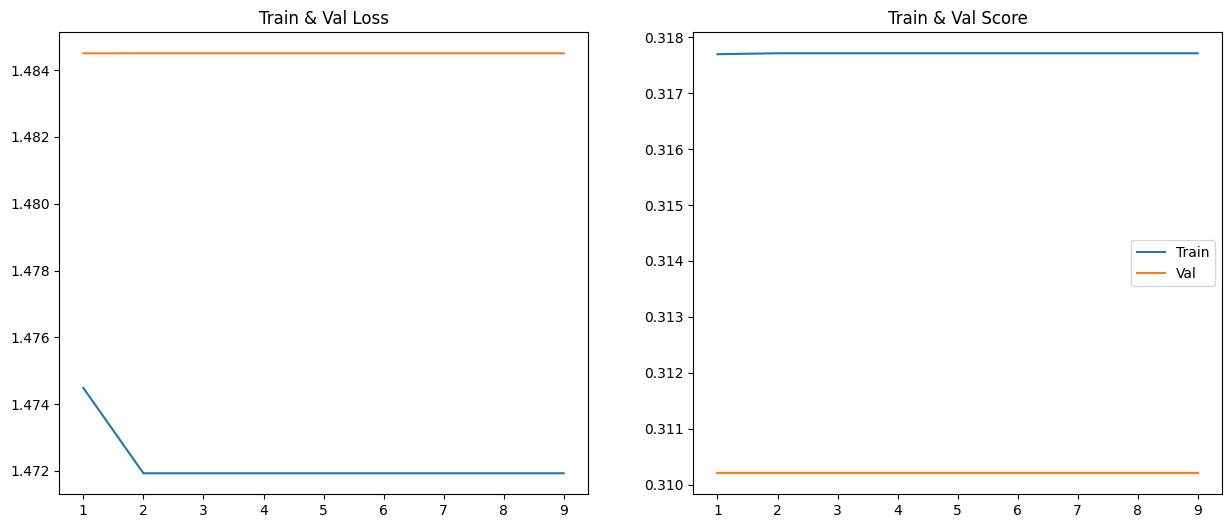

In [195]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,6))
ax1.plot(range(1,9+1), LOSS_HISTORY[0][:9], label='Train')
ax1.plot(range(1,9+1), LOSS_HISTORY[1][:9], label='Val')
ax1.set_title('Train & Val Loss')
ax2.plot(range(1, 9+1), SCORE_HISTORY[0][:9], label='Train')
ax2.plot(range(1, 9+1), SCORE_HISTORY[1][:9], label='Val')
ax2.set_title('Train & Val Score')
plt.legend()
plt.show()

In [89]:
## 저장경로
SAVE_PATH= r'C:\Users\KDP-25\Desktop\KDT_06\Pytorch\project\cgi-bin'

# 저장 파일명
SAVE_MODEL = SAVE_PATH+'\health_wbs.pth'

if os.path.exists(SAVE_MODEL):
   Model= torch.load(SAVE_MODEL, weights_only=False)

In [91]:
sample=[30,190,50, 9, 0, 0, 50, 50, 5*1000, 10,10, 0,0,0,0,0,1,1,1,0,0,0,0,0,0]
result=['Poor', 'Fair', 'Good', 'Very_good', 'Excellent']
r=predicting(Model, sample, type='muticlass', result=result)
print(r)

None


In [117]:
sample=[300,1900,5000, 900, 10, 10, 5000, 5000, 5*1000, 100,1000, 1,1123,112,1213,1,0,0,1,1,0,1,1,1,1]
dataTS=torch.FloatTensor(sample).reshape(1,-1)
pre_val=Model(dataTS)
pre_val=F.softmax(pre_val, dim=1)
a= pre_val.argmax().item()
print(f'{result[0]}: {max(pre_val[0].detach()):.4f}')
# return f'{result[0]}: {max(pre_val[0].detach()):.4f}'

Poor: 0.3564


In [88]:
life_T.feature.columns

Index(['age', 'weight', 'bmi', 'sleptime', 'children', 'smoker', 'acholPM',
       'ave_drnk', 'exer_num', 'fruit', 'veg', 'emo_support', 'chronic',
       'hacarth', 'addep', 'kidny', 'diabete', 'cancer', 'employ_A student',
       'employ_Employed for wages', 'employ_Out of work for 1 year or more',
       'employ_Out of work for less than 1 year', 'employ_Retired',
       'employ_Self-employed', 'employ_Unable to work'],
      dtype='object')

In [89]:
life_T.feature['fruit'].value_counts()

fruit
1.0    291549
0.0    199849
Name: count, dtype: int64